#Function

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
import os

import warnings


warnings.filterwarnings('ignore')
def display_images_horizontal(df, column_name,access):
    unique_values = df[column_name].unique()
    num_images = len(unique_values)

    fig, axes = plt.subplots(1, num_images, figsize=(5 * num_images, 5), squeeze=False)
    axes = axes.flatten()

    for i, value in enumerate(unique_values):
        subset = df[df[column_name] == value]
        if not subset.empty:
            img_url = subset.iloc[0][access]  # Ambil URL gambar pertama yang cocok
            img = mpimg.imread(img_url)

            axes[i].imshow(img)
            axes[i].set_title(f'{column_name}: {value}')
            axes[i].axis('off')  # Menyembunyikan axis

    plt.tight_layout()
    plt.show()

def plot_kelas_distributions(train_df, val_df, column_name):
    """
    Plot jumlah dan persentase data untuk kategori di train_df dan val_df.

    Parameters:
    - train_df: DataFrame untuk data pelatihan.
    - val_df: DataFrame untuk data validasi.
    - column_name: Nama kolom yang digunakan untuk kategori.
    """
    # Hitung jumlah data untuk setiap kategori di setiap DataFrame
    def count_kelas(df, kelas):
        return df[df[column_name] == kelas].shape[0]

    categories = train_df[column_name].unique()

    # Hitung jumlah data untuk setiap kategori di train_df dan val_df
    train_counts = [count_kelas(train_df, kelas) for kelas in categories]
    val_counts = [count_kelas(val_df, kelas) for kelas in categories]

    # Total data untuk setiap kategori di semua DataFrames
    total_counts = [train_counts[i] + val_counts[i] for i in range(len(categories))]

    # Hitung persentase untuk setiap DataFrame
    train_percentages = [count / total * 100 for count, total in zip(train_counts, total_counts)]
    val_percentages = [count / total * 100 for count, total in zip(val_counts, total_counts)]

    # Data untuk plot
    x_labels = categories
    index = range(len(categories))

    # Plotting
    fig, ax = plt.subplots(figsize=(14, 7))

    bar_width = 0.25
    bar1 = ax.bar([i - bar_width for i in index], train_counts, bar_width, label='Train_NoAug')
    bar2 = ax.bar(index, val_counts, bar_width, label='Validation_NoAug')

    # Menambahkan persentase ke setiap bar
    def autolabel(bars, percentages):
        for bar, percentage in zip(bars, percentages):
            height = bar.get_height()
            ax.annotate(f'{height}\n({percentage:.1f}%)',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(bar1, train_percentages)
    autolabel(bar2, val_percentages)

    ax.set_xlabel(column_name)
    ax.set_ylabel('Jumlah Data')
    ax.set_title(f'Jumlah Data dan Persentase untuk Setiap {column_name}')
    ax.set_xticks(index)
    ax.set_xticklabels(x_labels)
    ax.legend()

    plt.tight_layout()
    plt.show()

    # Print summary
    print(f"{column_name:<10} | {'Train':>10} | {'Validation':>12} ")
    print('-' * 42)

    # Print data
    for i, kelas in enumerate(categories):
        print(f"{kelas:<10} | {train_counts[i]:>10} ({train_percentages[i]:>6.1f}%) | "
              f"{val_counts[i]:>12} ({val_percentages[i]:>6.1f}%)")


import os
def create_directory_if_not_exists(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        print(f"Direktori '{directory}'\n berhasil dibuat.")
    else:
        print(f"Direktori '{directory}'\n sudah ada.")
base_path = '/content/drive/MyDrive/Skripsi_Isa Tarmana M_10120544/Program/'
data_path = base_path + 'data/'
create_directory_if_not_exists(base_path)
create_directory_if_not_exists(data_path)

Direktori '/content/drive/MyDrive/Skripsi_Isa Tarmana M_10120544/Program/'
 sudah ada.
Direktori '/content/drive/MyDrive/Skripsi_Isa Tarmana M_10120544/Program/data/'
 sudah ada.


In [3]:
def plot_kelas_leakage_distributions(clear_df, leakage_df, column_name):
    """
    Plot jumlah dan persentase data untuk kategori di clear_df dan leakage_df.

    Parameters:
    - clear_df: DataFrame untuk data pelatihan.
    - leakage_df: DataFrame untuk data validasi.
    - column_name: Nama kolom yang digunakan untuk kategori.
    """
    # Hitung jumlah data untuk setiap kategori di setiap DataFrame
    def count_kelas(df, kelas):
        return df[df[column_name] == kelas].shape[0]

    categories = clear_df[column_name].unique()

    # Hitung jumlah data untuk setiap kategori di clear_df dan leakage_df
    clear_counts = [count_kelas(clear_df, kelas) for kelas in categories]
    val_counts = [count_kelas(leakage_df, kelas) for kelas in categories]

    # Total data untuk setiap kategori di semua DataFrames
    total_counts = [clear_counts[i] + val_counts[i] for i in range(len(categories))]

    # Hitung persentase untuk setiap DataFrame
    clear_percentages = [count / total * 100 for count, total in zip(clear_counts, total_counts)]
    val_percentages = [count / total * 100 for count, total in zip(val_counts, total_counts)]

    # Data untuk plot
    x_labels = categories
    index = range(len(categories))

    # Plotting
    fig, ax = plt.subplots(figsize=(14, 7))

    bar_width = 0.25
    bar1 = ax.bar([i - bar_width for i in index], clear_counts, bar_width, label='Clear')
    bar2 = ax.bar(index, val_counts, bar_width, label='Leakage Data')

    # Menambahkan persentase ke setiap bar
    def autolabel(bars, percentages):
        for bar, percentage in zip(bars, percentages):
            height = bar.get_height()
            ax.annotate(f'{height}\n({percentage:.1f}%)',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(bar1, clear_percentages)
    autolabel(bar2, val_percentages)

    ax.set_xlabel(column_name)
    ax.set_ylabel('Jumlah Data')
    ax.set_title(f'Jumlah Data dan Persentase untuk Setiap {column_name}')
    ax.set_xticks(index)
    ax.set_xticklabels(x_labels)
    ax.legend()

    plt.tight_layout()
    plt.show()

    # Print summary
    print(f"{column_name:<10} | {'clear':>10} | {'Leakage':>12} ")
    print('-' * 42)

    # Print data
    for i, kelas in enumerate(categories):
        print(f"{kelas:<10} | {clear_counts[i]:>10} ({clear_percentages[i]:>6.1f}%) | "
              f"{val_counts[i]:>12} ({val_percentages[i]:>6.1f}%)")


#Load Data

In [4]:

import pandas as pd
import tensorflow as tf
print('Versi Tensorflow :',tf.__version__)

Versi Tensorflow : 2.17.0


In [5]:
import os
def create_directory_if_not_exists(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        print(f"Direktori '{directory}'\n berhasil dibuat.")
    else:
        print(f"Direktori '{directory}'\n sudah ada.")
base_path = '/content/drive/MyDrive/Skripsi_Isa Tarmana M_10120544/Program/'
data_path = base_path + 'data/'
create_directory_if_not_exists(base_path)
create_directory_if_not_exists(data_path)

Direktori '/content/drive/MyDrive/Skripsi_Isa Tarmana M_10120544/Program/'
 sudah ada.
Direktori '/content/drive/MyDrive/Skripsi_Isa Tarmana M_10120544/Program/data/'
 sudah ada.


# Definisikan Riset

In [6]:
name_research = 'Subject Wise Split Category'
skenario = 'Category'
Data = 'IDG'
name_model = 'fine_tuned_Resnet50V2'
setting ='rl(0.5 per 4)_opt[Adamax]'

#Gambar
channels = 3
size_img = (216,324)
shape_img = (size_img[0],size_img[1], channels)

# Data
# train_df = pd.read_csv(data_path+f'{Data}/Aug{Data}_train_df_{skenario}.csv')
# val_df = pd.read_csv(data_path+f'val_{skenario}_NoAug.csv')

train_df = pd.read_csv(data_path+f'{Data}/Aug{Data}_train_df_{skenario}.csv')
val_df = pd.read_csv(data_path+f'{Data}/Aug{Data}_val_df_{skenario}.csv')

# train_df = pd.read_csv(data_path+f'Augment&split/{Data}/Augment&split_Aug_{Data}_train_df_{skenario}.csv')
# val_df = pd.read_csv(data_path+f'Augment&split/{Data}/Augment&split_Aug_{Data}_val_df_{skenario}.csv')
# Assuming aug1_df and aug2_df have the same columns

#Train Model
epoch_n = 30
count_patience = 10
lr_patience = 5
lr_factor = 0.2
test_df = val_df

research =f'{name_research}_{skenario}_{Data}_{name_model}_{setting}'

print(f'datetime : {pd.Timestamp.now()}')
print('[!] Riset dimulai')
print(research)

research_folder = base_path + f'{name_research}/'
create_directory_if_not_exists(research_folder)

datetime : 2024-09-21 04:35:29.393342
[!] Riset dimulai
Subject Wise Split Category_Category_IDG_fine_tuned_Resnet50V2_rl(0.5 per 4)_opt[Adamax]
Direktori '/content/drive/MyDrive/Skripsi_Isa Tarmana M_10120544/Program/Subject Wise Split Category/'
 sudah ada.


# Data

## View Data

Skenario Category Masked:


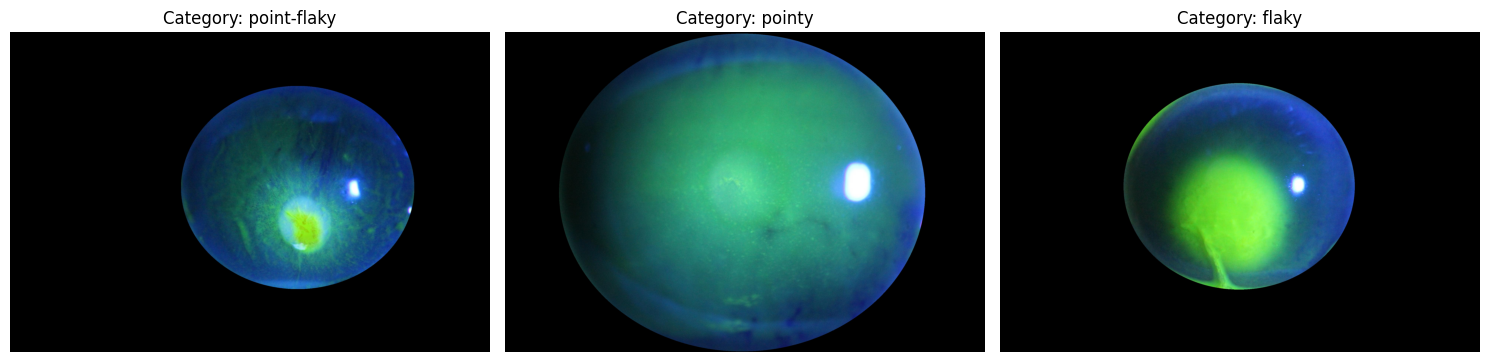

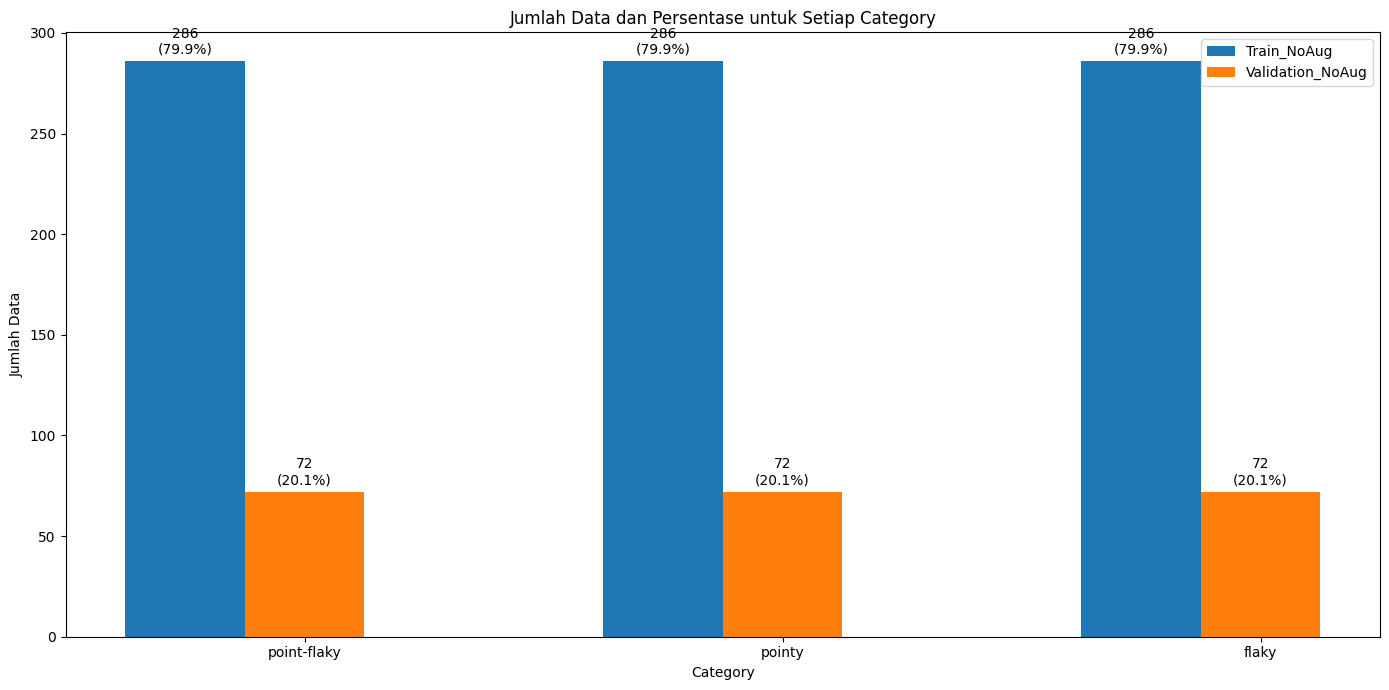

Category   |      Train |   Validation 
------------------------------------------
point-flaky |        286 (  79.9%) |           72 (  20.1%)
pointy     |        286 (  79.9%) |           72 (  20.1%)
flaky      |        286 (  79.9%) |           72 (  20.1%)


In [7]:
print(f'Skenario {skenario} Masked:')
display_images_horizontal(train_df, f'{skenario}','Url')
plot_kelas_distributions(train_df, val_df, f'{skenario}')

In [8]:
print('Train Data')
print('Jumlah Data :',train_df[skenario].shape[0])
display(train_df.head())
print('Validation & Test Data')
print('Jumlah Data :',val_df[skenario].shape[0])
display(val_df.head())

Train Data
Jumlah Data : 858


,name,Category,Url
0,579-masked.jpg,point-flaky,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...
1,21-masked.jpg,pointy,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...
2,133-masked.jpg,pointy,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...
3,334-masked.jpg,pointy,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...
4,27-masked.jpg,pointy,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...


Validation & Test Data
Jumlah Data : 216


,name,Category,Url
0,143-masked.jpg,pointy,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...
1,357-masked.jpg,pointy,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...
2,651-masked.jpg,flaky,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...
3,302-masked.jpg,pointy,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...
4,574-masked.jpg,point-flaky,/content/drive/MyDrive/Skripsi_Isa Tarmana M_1...


In [9]:
train_df['name'] = train_df['name'].str.replace('.jpg', '', regex=False)
val_df['name'] = val_df['name'].str.replace('.jpg', '', regex=False)


## Kebocoran data

## Mengambil data gambar asli yang leakage pada data latih dan validasi

In [10]:
unique_train_names = train_df['name'].unique()
unique_val_names = val_df['name'].unique()
# Buat DataFrame dari nilai unik
unique_train_df = pd.DataFrame(unique_train_names, columns=['name'])
unique_val_df = pd.DataFrame(unique_val_names, columns=['name'])

print(f'Jumlah data unique train : {unique_train_df.shape[0]}')
print(f'Jumlah data unique val : {unique_val_df.shape[0]}')
print(f'Total data : {unique_train_df.shape[0]+unique_val_df.shape[0]}')

Jumlah data unique train : 569
Jumlah data unique val : 143
Total data : 712


In [11]:
leakage_df = pd.merge(unique_train_df, unique_val_df, on='name')
leakage_names = leakage_df['name'].unique()
print(f'Jumlah data leakage : {leakage_df.shape[0]}')
print('Nama data yang terindikasi leakage')
print(leakage_names)

Jumlah data leakage : 0
Nama data yang terindikasi leakage
[]


## Data yang leakage dikeduanya

In [12]:
leakage_train_df = train_df[train_df['name'].isin(leakage_names)]
print(f'Jumlah data leakage train : {leakage_train_df.shape[0]}({(leakage_train_df.shape[0]/train_df.shape[0]*100):.2f} %)')
display(leakage_train_df.head())

Jumlah data leakage train : 0(0.00 %)


,name,Category,Url


In [13]:
leakage_val_df = val_df[val_df['name'].isin(leakage_names)]
print(f'Jumlah data leakage val : {leakage_val_df.shape[0]}({(leakage_val_df.shape[0]/val_df.shape[0]*100):.2f} %)')
display(leakage_val_df.head())

Jumlah data leakage val : 0(0.00 %)


,name,Category,Url


## Menampilkan hasil leakage

IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 1000x600 with 0 Axes>

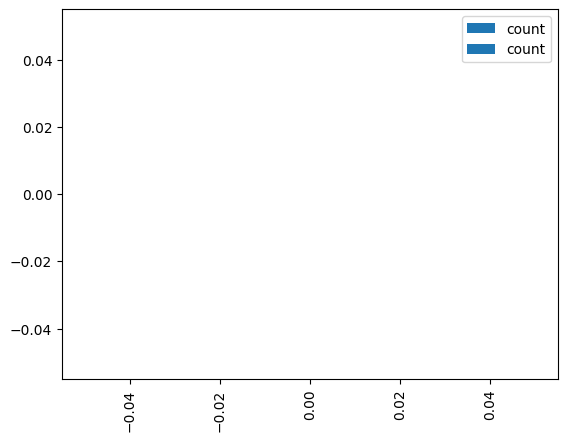

In [14]:
# Hitung banyaknya data untuk setiap 'name' pada leakage_train_df
train_name_counts = leakage_train_df['name'].value_counts()

# Ambil 5 teratas pada leakage_train_df
top_5_train_counts = train_name_counts.head()

# Hitung banyaknya data untuk setiap 'name' pada leakage_val_df
val_name_counts = leakage_val_df['name'].value_counts()

# Ambil 5 teratas pada leakage_val_df
top_5_val_counts = val_name_counts.head()

# Gabungkan kedua Series untuk memastikan semua nama ada di kedua Series
combined_counts = pd.concat([top_5_train_counts, top_5_val_counts], axis=1).fillna(0)

# Buat diagram batang
plt.figure(figsize=(10, 6))
combined_counts.plot(kind='bar')
plt.title('5 Data Teratas Berdasarkan Name (Leakage Train vs Val)')
plt.xlabel('Name')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=45, ha='right')
plt.legend(['Train', 'Val'])
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Daftar nama bocor
nama_data_leakage = random.choice(leakage_names)

# Pilih salah satu nama bocor yang ingin ditampilkan

# Filter data leakage_val_df dan leakage_train_df berdasarkan nama bocor
filtered_val_df = leakage_val_df[leakage_val_df['name'] == nama_data_leakage]
filtered_train_df = leakage_train_df[leakage_train_df['name'] == nama_data_leakage]

# Fungsi untuk menampilkan gambar secara horizontal
def display_images_horizontal(df, title):
    num_images = len(df)
    if num_images == 0:
        return

    fig, axes = plt.subplots(1, num_images, figsize=(num_images * 2, 2))  # Adjust figsize as needed
    if num_images == 1:
        axes = [axes]

    for ax, (_, row) in zip(axes, df.iterrows()):
        img = mpimg.imread(row['Url'])
        ax.imshow(img)
        ax.axis('off')

    plt.suptitle(title)
    plt.show()

# Tampilkan gambar dari path lokal
print(f"Data leakage {nama_data_leakage}")

print("Pada Train:")
display_images_horizontal(filtered_train_df, 'Train Images')

print("\nPada Validation:")
display_images_horizontal(filtered_val_df, 'Validation Images')


## Data yang tidak Leakage

In [ ]:
clear_train_df = train_df[~train_df['name'].isin(leakage_names)]
print(f'Jumlah data clear train : {clear_train_df.shape[0]}({(clear_train_df.shape[0]/train_df.shape[0]*100):.2f} %)')
display(clear_train_df.head())

In [ ]:
clear_val_df = val_df[~val_df['name'].isin(leakage_names)]
print(f'Jumlah data clear val : {clear_val_df.shape[0]}({(clear_val_df.shape[0]/val_df.shape[0]*100):.2f} %)')
display(clear_val_df.head())

## Result

In [ ]:
print(f'Leakage and clear data validation {skenario} Masked:')

plot_kelas_leakage_distributions(clear_train_df, leakage_train_df, f'{skenario}')

In [ ]:
clear_val_df[skenario].value_counts()

In [ ]:
print(f'Leakage and clear data validation {skenario} Masked:')

plot_kelas_leakage_distributions(clear_val_df, leakage_val_df, f'{skenario}')

# Evaluation

### Function

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import img_to_array
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import f1_score, recall_score, precision_score, cohen_kappa_score
import matplotlib.pyplot as plt
from google.colab import drive

!pip install keras_preprocessing --quiet
from keras_preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score, cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet_v2 import preprocess_input as preprocess_resnet50v2
from sklearn.metrics import classification_report


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.4 MB/s eta 0:00:00


In [16]:
test_df= val_df
augment = ImageDataGenerator(

    rescale=1./255
)
# Create validation generator
test_generator = augment.flow_from_dataframe(
    dataframe=test_df,
    x_col='Url',
    y_col=skenario,
    target_size=size_img,
    class_mode='categorical',
    shuffle=False,
    seed=42,
    batch_size=32
)
train_generator = augment.flow_from_dataframe(
    dataframe=train_df,
    x_col='Url',
    y_col=skenario,
    target_size=size_img,
    class_mode='categorical',
    shuffle=False,
    seed=42,
    batch_size=32
)

print(test_generator.class_indices)
# print(test_generator.class_indices)

Found 216 validated image filenames belonging to 3 classes.
Found 858 validated image filenames belonging to 3 classes.
{'flaky': 0, 'point-flaky': 1, 'pointy': 2}


In [17]:

import tensorflow as tf


checkpoint_filepath_loss = research_folder + f'V-los_{research}.keras'

# loaded_model_acc = tf.keras.models.load_model(checkpoint_filepath_accuracy)
loaded_model_loss = tf.keras.models.load_model(checkpoint_filepath_loss)

csv_path = research_folder + f'history_{research}.csv'
History = pd.read_csv(csv_path)



In [18]:
loaded_model_loss.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 216, 324, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 222, 330, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 108, 162, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 110, 164, 64)   │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 54, 81, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 54, 81, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 54, 81, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 54, 81, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 54, 81, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 54, 81, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 56, 83, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 54, 81, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 54, 81, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 54, 81, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 54, 81, 256)    │         16,640 │ conv2_block1_preact_r… │
│ (Conv2D)             

 Total params: 76,907,275 (293.38 MB)

 Trainable params: 25,620,611 (97.73 MB)

 Non-trainable params: 45,440 (177.50 KB)

 Optimizer params: 51,241,224 (195.47 MB)

### Grafik Pelatihan

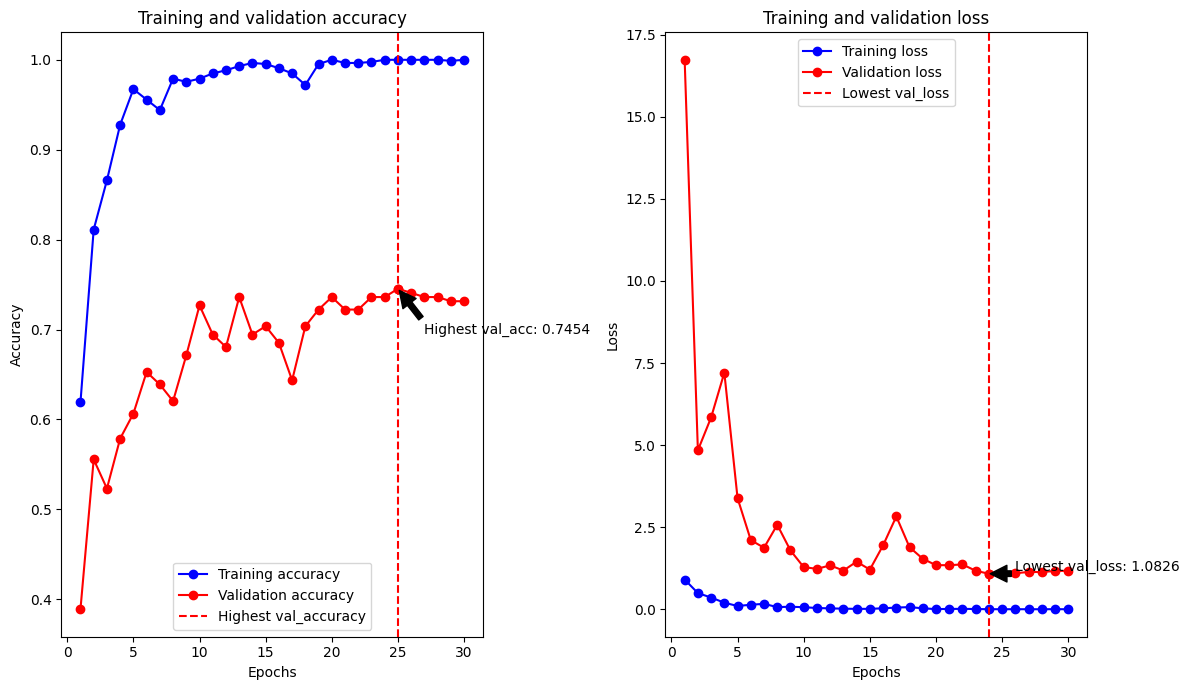

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file CSV
# Ekstrak History akurasi dan loss dari CSV
acc = History['accuracy'].tolist()
val_acc = History['val_accuracy'].tolist()
loss = History['loss'].tolist()
val_loss = History['val_loss'].tolist()

# Range epochs
epochs = range(1, len(acc) + 1)

# Temukan titik tertinggi dan terendah untuk val_accuracy dan val_loss
max_val_acc = max(val_acc)
min_val_loss = min(val_loss)
max_val_acc_epoch = val_acc.index(max_val_acc) + 1
min_val_loss_epoch = val_loss.index(min_val_loss) + 1

# Plotting akurasi
plt.figure(figsize=(12, 7))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.axvline(max_val_acc_epoch, linestyle='--', color='r', label='Highest val_accuracy')
plt.scatter([max_val_acc_epoch], [max_val_acc], color='red')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.annotate(f'Highest val_acc: {max_val_acc:.4f}', xy=(max_val_acc_epoch, max_val_acc), xytext=(max_val_acc_epoch+2, max_val_acc-0.05),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.axvline(min_val_loss_epoch, linestyle='--', color='r', label='Lowest val_loss')
plt.scatter([min_val_loss_epoch], [min_val_loss], color='red')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.annotate(f'Lowest val_loss: {min_val_loss:.4f}', xy=(min_val_loss_epoch, min_val_loss), xytext=(min_val_loss_epoch+2, min_val_loss+0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.tight_layout()
plt.show()


## Model Predict processing

In [20]:
import numpy as np

# Menghasilkan prediksi
predictions_prob = loaded_model_loss.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1,verbose=1)
test_loss, test_accuracy = loaded_model_loss.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size + 1,verbose=1)

# Mengambil kelas dengan probabilitas tertinggi
predict_labels = np.argmax(predictions_prob, axis=1)
true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())



7/7 ━━━━━━━━━━━━━━━━━━━━ 81s 12s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 890ms/step - accuracy: 0.7729 - loss: 1.0022


In [21]:
import numpy as np

# Menghasilkan prediksi

train_loss, train_accuracy = loaded_model_loss.evaluate(train_generator, steps=train_generator.samples // train_generator.batch_size + 1,verbose=1)




27/27 ━━━━━━━━━━━━━━━━━━━━ 317s 12s/step - accuracy: 1.0000 - loss: 9.4864e-04


## Model Evaluate

In [22]:
print('/nModel Evaluate Best Loss:')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')

/nModel Evaluate Best Loss:
Test Accuracy: 0.7361111044883728
Test Loss: 1.0825726985931396


In [23]:
print('/nModel Evaluate Best Loss:')
print(f'train Accuracy: {train_accuracy  }')
print(f'train Loss: {train_loss}')


/nModel Evaluate Best Loss:
train Accuracy: 1.0
train Loss: 0.0008511978085152805


### Classification Report

In [24]:
report = classification_report(true_labels, predict_labels, target_names=class_labels)
print("Classification Report for Model Checkpoints:")
print(report)

Classification Report for Model Checkpoints:
              precision    recall  f1-score   support

       flaky       0.78      0.64      0.70        72
 point-flaky       0.62      0.62      0.62        72
      pointy       0.80      0.94      0.87        72

    accuracy                           0.74       216
   macro avg       0.73      0.74      0.73       216
weighted avg       0.73      0.74      0.73       216



### Confusion Matrix

Jumlah data : 216


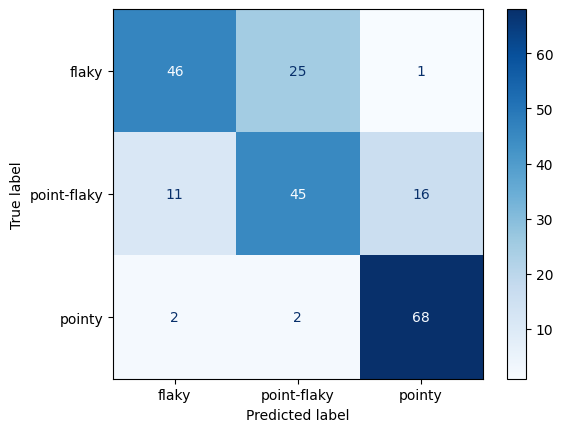

In [25]:

# Create and display confusion matrix
cm = confusion_matrix(true_labels, predict_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap='Blues')
disp.figure_.savefig(research_folder+f'CM_{research}_.png')  # Save confusion matrix to a file
print('Jumlah data :', test_df.shape[0])

In [26]:
kappa = cohen_kappa_score(true_labels, predict_labels)
print(f'Kappa: {kappa}')

Kappa: 0.6041666666666667


### AUC

In [27]:
from sklearn.metrics import roc_auc_score
import numpy as np

class_names = list(test_generator.class_indices.keys())

# List untuk menyimpan AUC per pasangan
auc_scores = []

# Loop untuk setiap pasangan kelas
for i in range(len(class_names)):
    for j in range(i + 1, len(class_names)):
        class1 = class_names[i]
        class2 = class_names[j]

        # Filter data untuk kedua kelas ini
        filtered_df = test_df[test_df[skenario].isin([class1, class2])]

        # Membuat generator untuk pasangan kelas ini
        generator = augment.flow_from_dataframe(
            dataframe=filtered_df,
            x_col='Url',
            y_col=skenario,
            target_size=size_img,
            class_mode='categorical',
            shuffle=False,
            seed=42,
            batch_size=32
        )

        # Prediksi probabilitas untuk kedua kelas
        predictions_prob = loaded_model_loss.predict(generator, steps=generator.samples // generator.batch_size + 1,verbose=1)

        # Mendapatkan label sebenarnya
        y_true = generator.classes

        # Mengonversi label ke one-hot encoding
        y_true_bin = np.eye(2)[y_true]  # Karena hanya ada dua kelas

        # Select probabilities only for the two classes being compared
        relevant_predictions_prob = predictions_prob[:, [test_generator.class_indices[class1], test_generator.class_indices[class2]]]

        # Menghitung AUC Score untuk pasangan ini
        auc_score = roc_auc_score(y_true_bin, relevant_predictions_prob,  multi_class='ovo')
        auc_scores.append({
            'pair': (class1, class2),
            'auc_score': auc_score
        })

# Menampilkan hasil
print('-------------------------------------------')
print("AUC Scores per Pair:")
for score in auc_scores:
    print(f"Pair: {score['pair']}, AUC Score: {score['auc_score']}")

Found 144 validated image filenames belonging to 2 classes.
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step
Found 144 validated image filenames belonging to 2 classes.
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 691ms/step
Found 144 validated image filenames belonging to 2 classes.
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 519ms/step
-------------------------------------------
AUC Scores per Pair:
Pair: ('flaky', 'point-flaky'), AUC Score: 0.7698688271604939
Pair: ('flaky', 'pointy'), AUC Score: 0.9615162037037037
Pair: ('point-flaky', 'pointy'), AUC Score: 0.9402970679012346
